In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/My Drive/생물정보학실습데이터/final_data.HepG2.Histone.Enhancer.csv')

In [2]:
df = pd.read_csv('22_final_data.HepG2.Histone.Enhancer.csv')

In [3]:
df

,Pos,gene_name,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1,enhancer
0,chr10:100216834-100995619,HPSE2,0.00000,0.0,0.0,5.81644,0.00000,0.0,0.0,0.0,0.0,1
1,chr10:101156627-101190381,GOT1,0.00000,0.0,0.0,3.98603,0.00000,0.0,0.0,0.0,0.0,1
2,chr10:101286107-101290934,LINC01475,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
3,chr10:101286705-101288224,AL513542.1,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
4,chr10:101292699-101296281,NKX2-3,8.02894,0.0,0.0,13.50215,9.78393,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7129,chrX:9217960-9243246,AC003684.1,0.00000,0.0,0.0,4.01233,0.00000,0.0,0.0,0.0,0.0,1
7130,chrX:9983294-10112514,WWC3,0.00000,0.0,0.0,4.41356,0.00000,0.0,0.0,0.0,0.0,1
7131,chrX:99899192-99930785,SRPX2,0.00000,0.0,0.0,0.00000,4.75055,0.0,0.0,0.0,0.0,1
7132,chrX:9992882-10006694,WWC3-AS1,0.00000,0.0,0.0,4.41356,0.00000,0.0,0.0,0.0,0.0,1


In [5]:
# !pip install missingno

<AxesSubplot:>

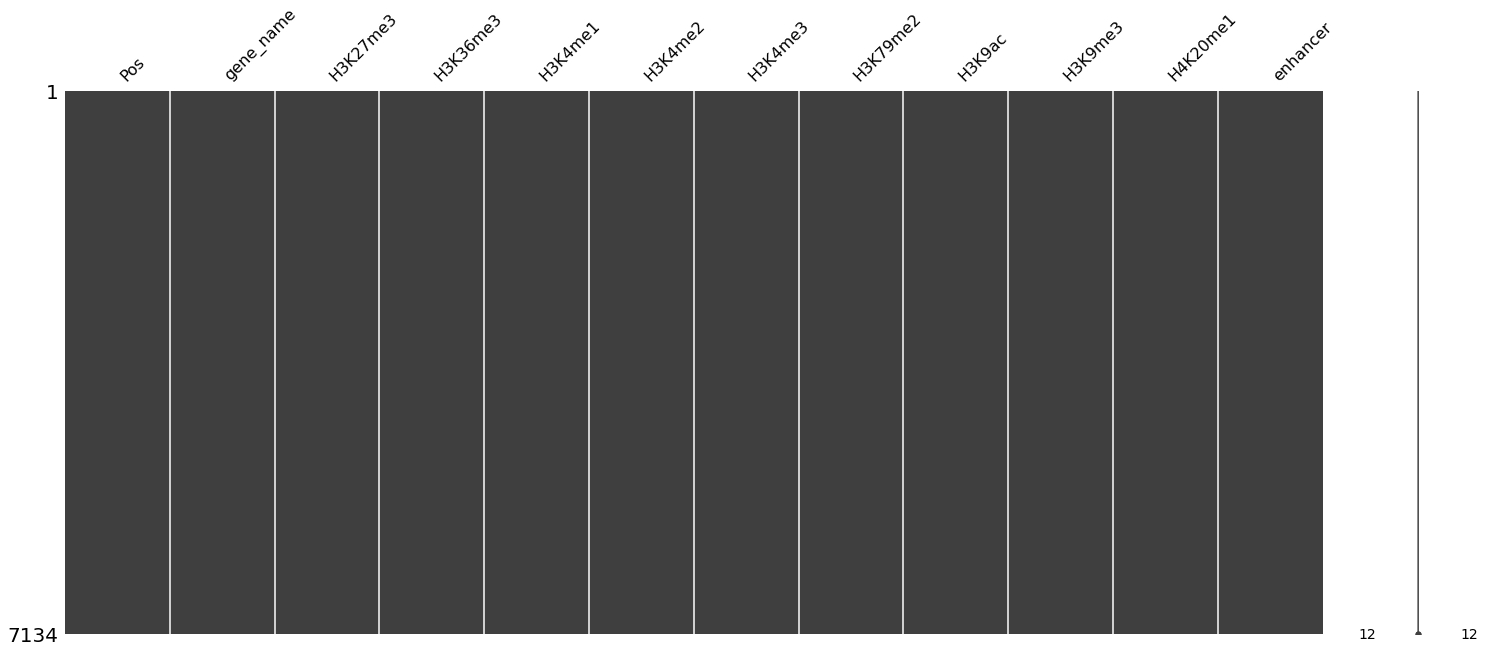

In [4]:
# 결측치 확인
import missingno as msno
display(msno.matrix(df))

<AxesSubplot:>

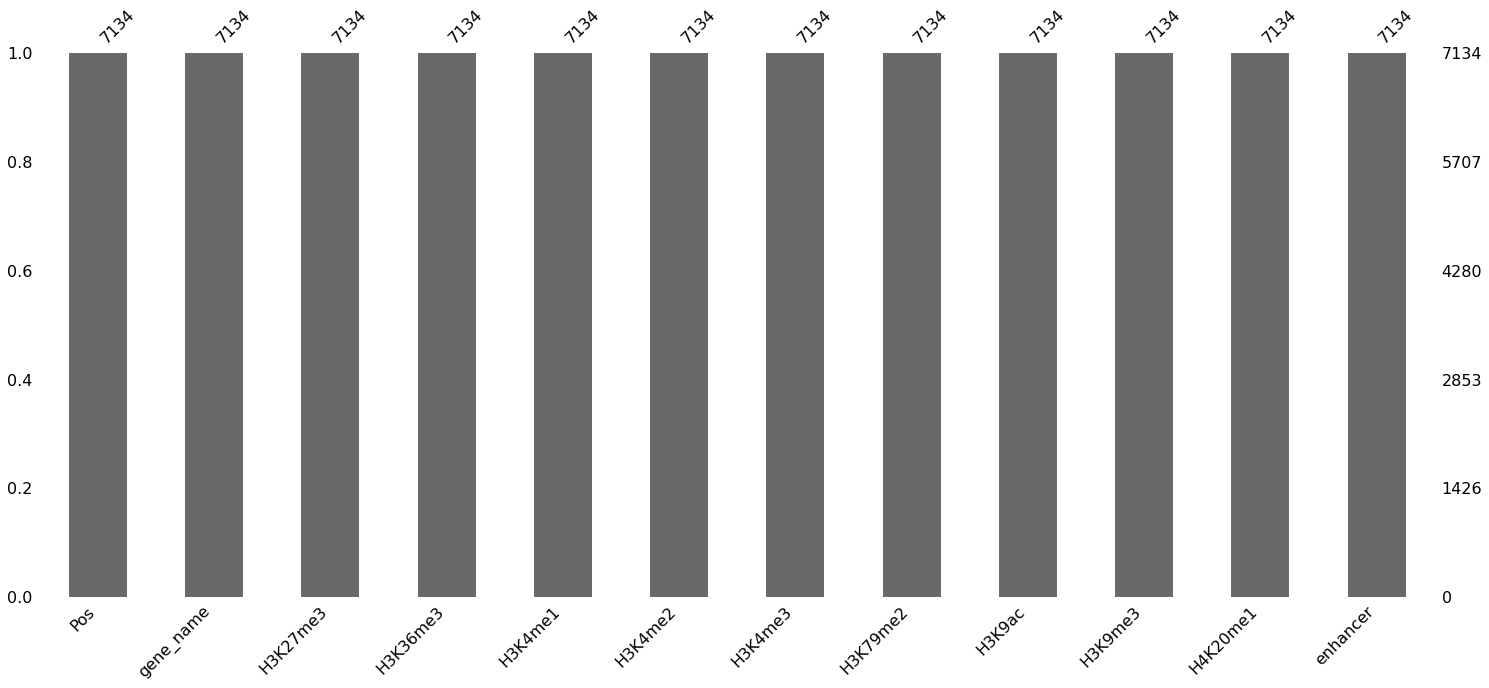

In [5]:
display(msno.bar(df))

In [8]:
# missing = df.isnull().sum()
# missing = missing[missing > 0]
# missing.sort_values(inplace=True)
# missing.plot.bar(figsize = (12,6))

In [6]:
df.describe()

,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1,enhancer
count,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000
mean,1.425158,0.050376,0.925676,3.088716,3.559854,0.403111,0.898378,0.014459,0.195311,0.718531
std,2.576891,0.452893,1.989047,4.554636,5.405610,1.528361,2.660705,0.225790,0.911769,0.449747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.837962,0.000000,0.000000,5.318980,5.245690,0.000000,0.000000,0.000000,0.000000,1.000000
max,11.941240,6.326480,12.311430,34.643940,53.946900,20.411030,83.300270,5.899290,7.821960,1.000000


# Train Random Forest

In [7]:
df.head()

,Pos,gene_name,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1,enhancer
0,chr10:100216834-100995619,HPSE2,0.00000,0.0,0.0,5.81644,0.00000,0.0,0.0,0.0,0.0,1
1,chr10:101156627-101190381,GOT1,0.00000,0.0,0.0,3.98603,0.00000,0.0,0.0,0.0,0.0,1
2,chr10:101286107-101290934,LINC01475,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
3,chr10:101286705-101288224,AL513542.1,7.41865,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0
4,chr10:101292699-101296281,NKX2-3,8.02894,0.0,0.0,13.50215,9.78393,0.0,0.0,0.0,0.0,0


In [8]:
df.values

array([['chr10:100216834-100995619', 'HPSE2', 0.0, ..., 0.0, 0.0, 1],
       ['chr10:101156627-101190381', 'GOT1', 0.0, ..., 0.0, 0.0, 1],
       ['chr10:101286107-101290934', 'LINC01475', 7.41865, ..., 0.0, 0.0,
        0],
       ...,
       ['chrX:99899192-99930785', 'SRPX2', 0.0, ..., 0.0, 0.0, 1],
       ['chrX:9992882-10006694', 'WWC3-AS1', 0.0, ..., 0.0, 0.0, 1],
       ['chrY:16634453-16957530', 'NLGN4Y', 0.0, ..., 0.0, 0.0, 1]],
      dtype=object)

In [9]:
X_features = df.values[:,2:-1].astype('float')
y_target = df.values[:, -1].astype('float')

In [10]:
X_features

array([[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [7.41865, 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       ...,
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ]])

In [14]:
y_target

array([1., 1., 0., ..., 1., 1., 1.])

In [15]:
# 0과 1의 정답셋의 비율을 살펴본다.
np.bincount(y_target.astype(int))

# 균형이 맞지 않는 imbalanced data이므로, 이것을 방지해주기 위해 class_weight라는 parameter를 설정해준다.

array([2008, 5126])

In [16]:
# TODO PerfectGuide보고 HP튜닝 내용 보충하기.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = list(range(1,30))
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# 연속형 범주나 많은 범주를 가진 feature들을 과대평가하는 경향이 있기 때문에 이를 완화시키는 옵션
# mean_impurity_decrease = 0 # float 형태. -> 시간이 너무 오래걸려서 뺌

class_weight = ['balanced', 'balanced_subsample']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight': class_weight}

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2)

In [18]:
import multiprocessing

multiprocessing.cpu_count()

88

### 사이킷런 랜덤 포레스트 하이퍼 파라미터
>

In [19]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 88 concurrent workers.


[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=28, class_weight=balanced, bootstrap=False 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=log2, max_depth=20, class_weight=balanced, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=4, class_weight=balanced, bootstrap=True 
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=20, class_weight=balanced, bootstrap=False 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=4, class_weight=balanced, bootstrap=True 
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=12, class_weight=balanced_subsample, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=4, class_weight=balanced, bootstrap=True 
[CV] n_estimators=1000, min_samp

[Parallel(n_jobs=-1)]: Done 276 out of 300 | elapsed:   51.8s remaining:    4.5s


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=14, class_weight=balanced_subsample, bootstrap=True, total=  10.9s
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=29, class_weight=balanced, bootstrap=False, total=  12.4s
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=27, class_weight=balanced, bootstrap=False, total=  21.7s
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=7, class_weight=balanced_subsample, bootstrap=False, total=  21.1s
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=29, class_weight=balanced, bootstrap=False, total=  13.6s
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=29, class_weight=balanced, bootstrap=False, total=  24.3s
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   58.7s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
             

In [20]:
rf_random.cv_results_

{'mean_fit_time': array([14.74688252, 19.80748804,  1.92765133,  2.686649  ,  8.91728203,
        14.9937981 , 19.84924936, 11.09809868, 16.24777691, 13.18241962,
         1.65553013,  3.49262301, 21.01841489, 10.9451685 , 17.79465055,
         3.41137807, 16.5278848 , 18.49835579, 17.1206212 ,  6.33958276,
         9.95386926, 13.24141415, 11.62239726, 16.33491945, 16.38318404,
        18.93059246, 10.44473982,  8.96815316,  6.3782777 ,  6.70575229,
         3.10292292, 23.20201127, 32.73396548, 29.11924624,  8.89650663,
        20.14160395, 20.97010183,  3.13847415, 15.29842591, 17.85993854,
        19.04846422,  6.21973173,  7.96956786,  3.76270342, 26.79629461,
        15.58963728,  3.67367284,  5.8640995 ,  6.12666972, 22.42573539,
        26.67391578, 14.88741191,  6.64011876, 20.56172244, 22.21014094,
        12.15951133,  6.81242363,  7.09183017, 16.19765059, 17.65244524,
         2.58293756, 22.68639119,  2.08009775, 13.85674453,  7.23986936,
        18.70682502, 17.21797125, 

In [21]:
rf_random.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       max_features='log2', n_estimators=600)

In [22]:
rf_random.best_score_

0.9129144511249141

In [23]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 12,
 'class_weight': 'balanced',
 'bootstrap': True}

In [24]:
best_model = rf_random.best_estimator_

# Plot feature importnace

In [27]:
best_model.feature_importances_

array([0.58311827, 0.0016521 , 0.13166417, 0.08178818, 0.1347125 ,
       0.0275459 , 0.03111056, 0.00121716, 0.00719116])

In [28]:
df.columns

Index(['Pos', 'gene_name', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me2',
       'H3K4me3', 'H3K79me2', 'H3K9ac', 'H3K9me3', 'H4K20me1', 'enhancer'],
      dtype='object')

In [29]:
features = df.columns[2:-1]

In [30]:
feature_df = pd.DataFrame(best_model.feature_importances_, columns = ['Importance value'])
feature_df.index = features

In [31]:
feature_df

,Importance value
H3K27me3,0.583118
H3K36me3,0.001652
H3K4me1,0.131664
H3K4me2,0.081788
H3K4me3,0.134712
H3K79me2,0.027546
H3K9ac,0.031111
H3K9me3,0.001217
H4K20me1,0.007191


<AxesSubplot:title={'center':'Feature importance'}>

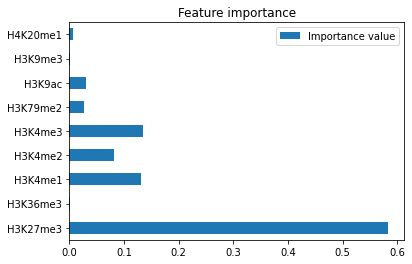

In [32]:
feature_df.plot(kind='barh', title = 'Feature importance')

In [33]:
test_result = best_model.predict(X_test)

In [34]:
test_result

array([0., 1., 1., ..., 1., 1., 1.])

In [35]:
best_model.score(X_test, y_test)

0.9110021023125437

# Confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix

pred = best_model.predict(X_test)
confusion_matrix(y_test, pred)

array([[358,  68],
       [ 59, 942]])

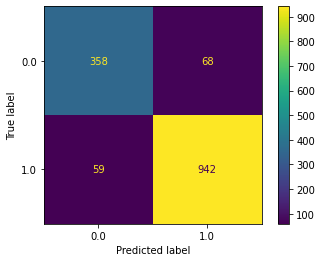

In [37]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_model, X_test, y_test) 

In [38]:
best_model.predict_proba(X_test)

array([[0.81912524, 0.18087476],
       [0.1093253 , 0.8906747 ],
       [0.03768599, 0.96231401],
       ...,
       [0.44421797, 0.55578203],
       [0.05925354, 0.94074646],
       [0.36484503, 0.63515497]])

In [39]:
best_model.predict_proba(X_test)[:, 0]

array([0.81912524, 0.1093253 , 0.03768599, ..., 0.44421797, 0.05925354,
       0.36484503])

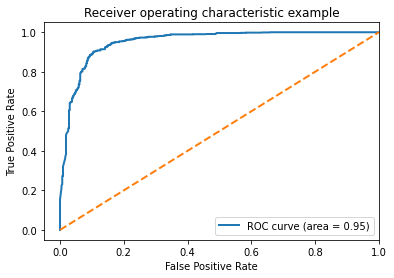

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0],
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Receiver operating characteristic example')

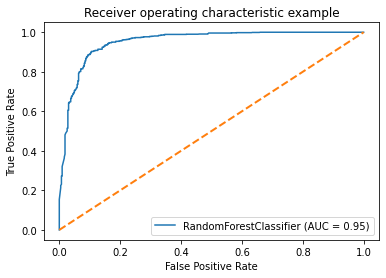

In [42]:
import matplotlib.pyplot as plt
from sklearn import metrics

metrics.plot_roc_curve(best_model, X_test, y_test)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

# Automl로 쉽게 hyperparameter tuning 하기

In [ ]:
!pip install -U pycaret

In [43]:
df['enhancer'] = df['enhancer'].astype('int')

In [44]:
import pycaret
pycaret.__version__

'2.3.10'

In [45]:
from pycaret.classification import * 

clf1 = setup(data = df, target = 'enhancer', 
             ignore_features = ['Pos','gene_name'],
             session_id=123)

,Description,Value
0,session_id,123
1,Target,enhancer
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7134, 12)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [46]:
# check the model library to see all models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [47]:
# train rf model using 5 fold CV
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9039,0.9270,0.9399,0.9269,0.9333,0.7613,0.7616
1,0.8959,0.9366,0.9245,0.9297,0.9271,0.7453,0.7453
2,0.9199,0.9534,0.9469,0.9416,0.9442,0.8024,0.8024
3,0.8888,0.9302,0.9315,0.9148,0.9231,0.7224,0.7228
4,0.9038,0.9443,0.9315,0.9341,0.9328,0.7638,0.7638
Mean,0.9025,0.9383,0.9348,0.9294,0.9321,0.7590,0.7592
Std,0.0104,0.0096,0.0077,0.0088,0.0071,0.0262,0.0261


In [48]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9040,0.9431,0.9413,0.9258,0.9335,0.7609,0.7612
1,0.9080,0.9469,0.9469,0.9262,0.9365,0.7699,0.7705
2,0.9080,0.9553,0.9413,0.9309,0.9361,0.7718,0.7720
3,0.9058,0.9594,0.9385,0.9307,0.9346,0.7662,0.7663
4,0.9018,0.9451,0.9302,0.9328,0.9315,0.7583,0.7583
5,0.9279,0.9659,0.9468,0.9521,0.9494,0.8236,0.8236
6,0.8938,0.9400,0.9272,0.9246,0.9259,0.7386,0.7386
7,0.9078,0.9405,0.9412,0.9307,0.9359,0.7717,0.7718
8,0.9018,0.9576,0.9328,0.9302,0.9315,0.7583,0.7583


In [49]:
import os
import sys
sys.version

'3.8.13 (default, Mar 28 2022, 11:38:47) \n[GCC 7.5.0]'

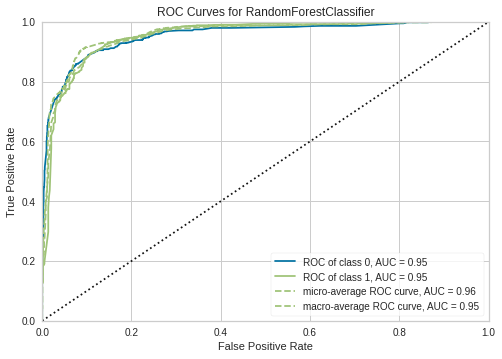

In [50]:
plot_model(tuned_rf, plot = 'auc')

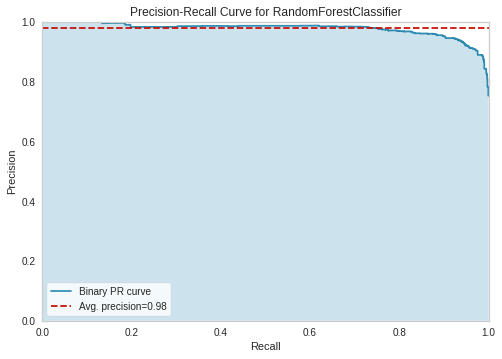

In [51]:
plot_model(tuned_rf, plot = 'pr')

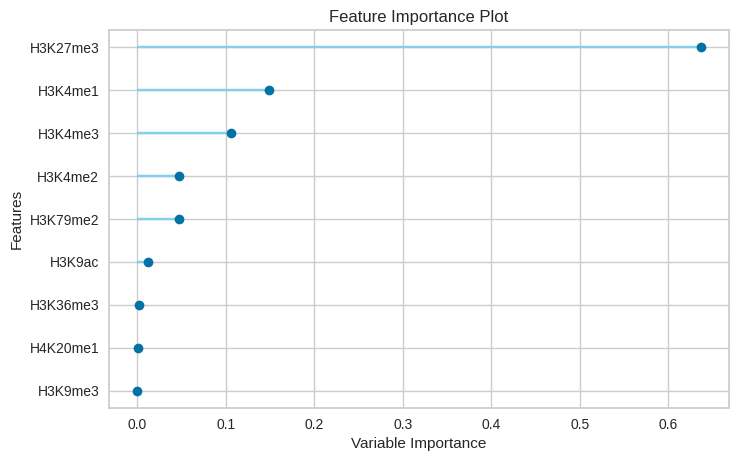

In [52]:
plot_model(tuned_rf, plot='feature')

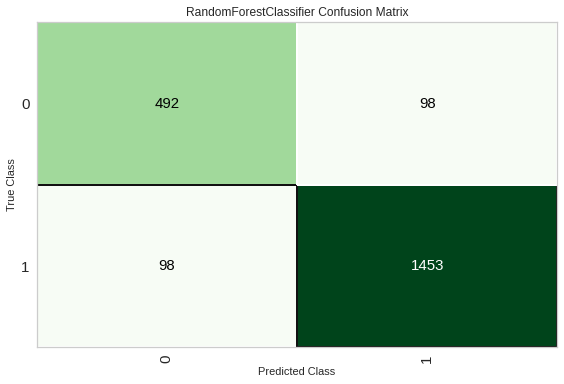

In [53]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [55]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [56]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9139,0.9561,0.9617,0.9215,0.9412,0.7809,0.7835,0.0800
lightgbm,Light Gradient Boosting Machine,0.9109,0.9515,0.9552,0.9231,0.9388,0.7748,0.7768,0.0370
ada,Ada Boost Classifier,0.9077,0.9494,0.9494,0.9239,0.9364,0.7680,0.7693,0.0400
knn,K Neighbors Classifier,0.9055,0.9329,0.9480,0.9222,0.9349,0.7626,0.7638,0.2260
rf,Random Forest Classifier,0.9045,0.9410,0.9385,0.9289,0.9336,0.7632,0.7635,0.8840
lr,Logistic Regression,0.9025,0.9465,0.9522,0.9152,0.9333,0.7524,0.7546,0.0230
et,Extra Trees Classifier,0.9001,0.9233,0.9320,0.9287,0.9303,0.7536,0.7539,0.7990
ridge,Ridge Classifier,0.8995,0.0000,0.9639,0.9024,0.9321,0.7390,0.7452,0.0160
lda,Linear Discriminant Analysis,0.8989,0.9444,0.9622,0.9030,0.9316,0.7380,0.7438,0.0180
dt,Decision Tree Classifier,0.8911,0.8741,0.9192,0.9281,0.9236,0.7339,0.7342,0.0140


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df

In [ ]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }

num_rounds = 400

In [ ]:
X_features = df.values[:,2:-1].astype('float')
y_target = df.values[:, -1].astype('float')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2)

In [ ]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환하는 예제
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

In [ ]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [ ]:
get_clf_eval(yTest, preds)

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)